#### Model 2: Using a Balanced Dataset and Smaller Filters

In [11]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade librosa soundfile

Note: you may need to restart the kernel to use updated packages.


In [13]:
import keras
from keras.models import load_model
keras.__version__

'3.4.1'

In [14]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, LeakyReLU, BatchNormalization, GRU
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

In [15]:
# for interacting with the operating system and file operation
import os, shutil
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [16]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.metrics import f1_score, roc_auc_score

In [17]:
from IPython.display import Audio

In [18]:
Ravdess = '/Users/dewaiiv/Desktop/Project Deep Learning/RAVDESS/audio_speech_actors_01-24'

In [19]:
# Initialize lists to hold emotions and file paths for RAVDESS
ravdess_emotion = []
ravdess_path = []

# Iterate through each actor directory and each file
for dir in os.listdir(Ravdess):
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        # Extract emotion part from the filename
        part = file.split('.')[0].split('-')
        ravdess_emotion.append(int(part[2]))  # Emotion label is in the 3rd part
        ravdess_path.append(os.path.join(Ravdess, dir, file))  # File path


# Create DataFrame for RAVDESS
ravdess_df = pd.DataFrame({'Emotions': ravdess_emotion,'Path': ravdess_path})

In [20]:
# Replace integer labels with emotion names without using inplace=True
emotion_mapping = {1: 'Neutral', 2: 'Calm', 3: 'Happy', 4: 'Sad',5: 'Angry', 6: 'Fearful', 7: 'Disgust', 8: 'Surprised'}
ravdess_df['Emotions'] = ravdess_df['Emotions'].replace(emotion_mapping)

In [21]:
ravdess_df.head()

Emotions                                               Path
0    Angry  /Users/dewaiiv/Desktop/Project Deep Learning/R...
1  Fearful  /Users/dewaiiv/Desktop/Project Deep Learning/R...
2  Fearful  /Users/dewaiiv/Desktop/Project Deep Learning/R...
3    Angry  /Users/dewaiiv/Desktop/Project Deep Learning/R...
4  Disgust  /Users/dewaiiv/Desktop/Project Deep Learning/R...

In [22]:
print(ravdess_df.Emotions.value_counts())

Emotions
Angry        192
Fearful      192
Disgust      192
Sad          192
Surprised    192
Happy        192
Calm         192
Neutral       96
Name: count, dtype: int64


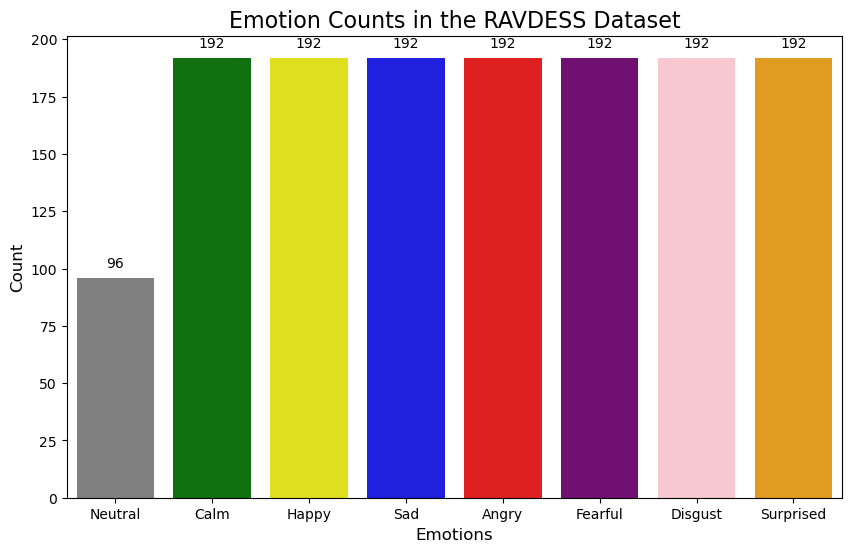

In [23]:
# Define colors for each emotion category
emotion_colors = {
    'Neutral': 'gray',
    'Calm': 'green',
    'Happy': 'yellow',
    'Sad': 'blue',
    'Angry': 'red',
    'Fearful': 'purple',
    'Disgust': 'pink',
    'Surprised': 'orange'
}

# Define the specific order for the emotions
emotion_order = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

# Plot with specified colors and add counts on top of each bar
plt.figure(figsize=(10, 6))
plt.title('Emotion Counts in the RAVDESS Dataset', size=16)

# Set Emotions to hue and specify legend=False
ax = sbn.countplot(data=ravdess_df, x='Emotions', order=emotion_order, hue='Emotions', palette=emotion_colors, dodge=False)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

### SAVESS Dataset

In [24]:
Savee = '/Users/dewaiiv/Desktop/Project Deep Learning/SAVEE'

In [25]:
# Process SAVEE dataset to extract neutral files
savee_emotion = []
savee_path = []

# Iterate through SAVEE dataset and extract information
for file in os.listdir(Savee):
    if file.endswith('.wav'):  # Ensure it's a .wav file
        full_path = os.path.join(Savee, file)
        part = file.split('_')[1]  # Extract the emotion code
        ele = part[:-6]  # Remove the trailing '01.wav'

        # Map the emotion code to its corresponding label
        if ele == 'n':  # Only add neutral files
            savee_emotion.append('Neutral')
            savee_path.append(full_path)

# Create DataFrame for SAVEE neutral files
savee_df = pd.DataFrame({'Emotions': savee_emotion,'Path': savee_path})

In [26]:
savee_df.head()

Emotions                                               Path
0  Neutral  /Users/dewaiiv/Desktop/Project Deep Learning/S...
1  Neutral  /Users/dewaiiv/Desktop/Project Deep Learning/S...
2  Neutral  /Users/dewaiiv/Desktop/Project Deep Learning/S...
3  Neutral  /Users/dewaiiv/Desktop/Project Deep Learning/S...
4  Neutral  /Users/dewaiiv/Desktop/Project Deep Learning/S...

In [27]:
print(savee_df.Emotions.value_counts())

Emotions
Neutral    120
Name: count, dtype: int64


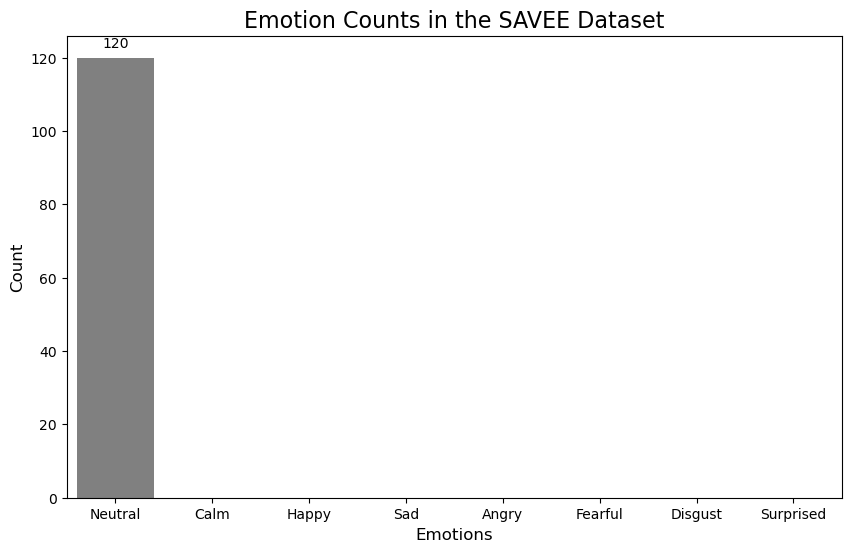

In [28]:
# Define colors for each emotion category
emotion_colors = {
    'Neutral': 'gray',
    'Calm': 'green',
    'Happy': 'yellow',
    'Sad': 'blue',
    'Angry': 'red',
    'Fearful': 'purple',
    'Disgust': 'pink',
    'Surprised': 'orange'
}

# Define the specific order for the emotions
emotion_order = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

# Plot with specified colors and add counts on top of each bar
plt.figure(figsize=(10, 6))
plt.title('Emotion Counts in the SAVEE Dataset', size=16)

# Set Emotions to hue and specify legend=False
ax = sbn.countplot(data=savee_df, x='Emotions', order=emotion_order, hue='Emotions', palette=emotion_colors, dodge=False)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [29]:
# Calculate how many neutral files are needed to balance
needed_files = ravdess_df.Emotions.value_counts().max() - ravdess_df.Emotions.value_counts().get('Neutral', 0)

# Initialize the final DataFrame to the original RAVDESS DataFrame
dataPath = ravdess_df.copy()

if needed_files > 0:
    # Randomly sample the required number of files from SAVEE neutral data
    sampled_savee_df = savee_df.sample(n=needed_files, random_state=42)
    # Combine RAVDESS and sampled SAVEE data
    dataPath = pd.concat([ravdess_df, sampled_savee_df], ignore_index=True)

In [30]:
print(dataPath.Emotions.value_counts())

Emotions
Angry        192
Fearful      192
Disgust      192
Sad          192
Surprised    192
Happy        192
Calm         192
Neutral      192
Name: count, dtype: int64


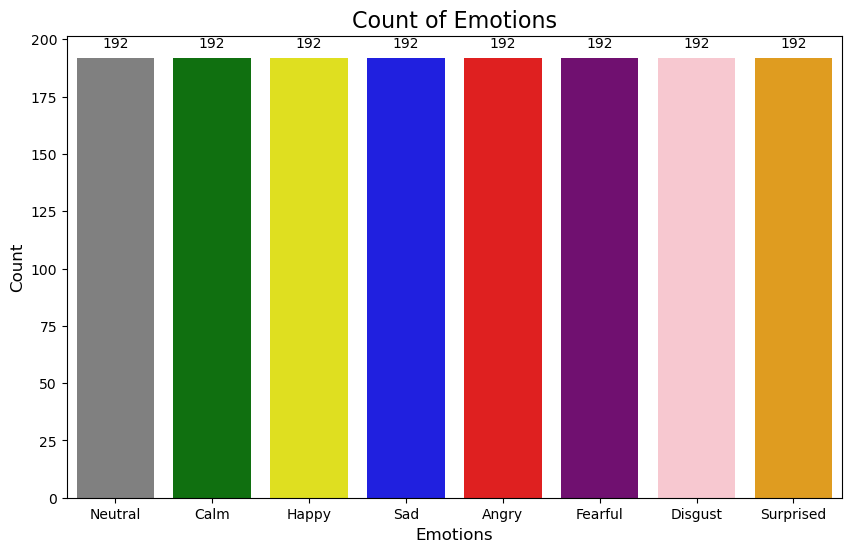

In [31]:
# Define colors for each emotion category
emotion_colors = {
    'Neutral': 'gray',
    'Calm': 'green',
    'Happy': 'yellow',
    'Sad': 'blue',
    'Angry': 'red',
    'Fearful': 'purple',
    'Disgust': 'pink',
    'Surprised': 'orange'
}

# Define the specific order for the emotions
emotion_order = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

# Plot with specified colors and add counts on top of each bar
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)

# Set Emotions to hue and specify legend=False
ax = sbn.countplot(data=dataPath, x='Emotions', order=emotion_order, hue='Emotions', palette=emotion_colors, dodge=False)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [32]:
def createWaveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} '.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [33]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

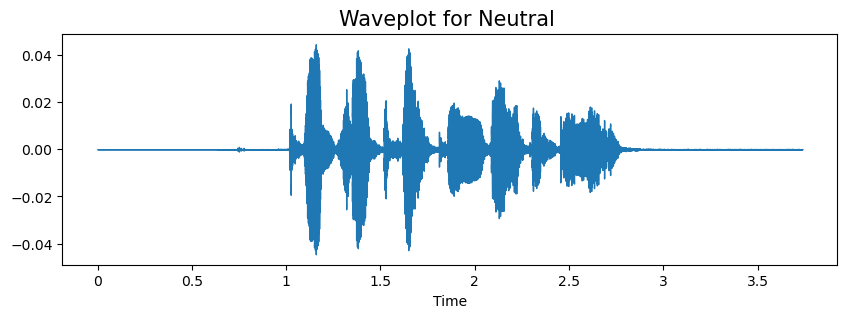

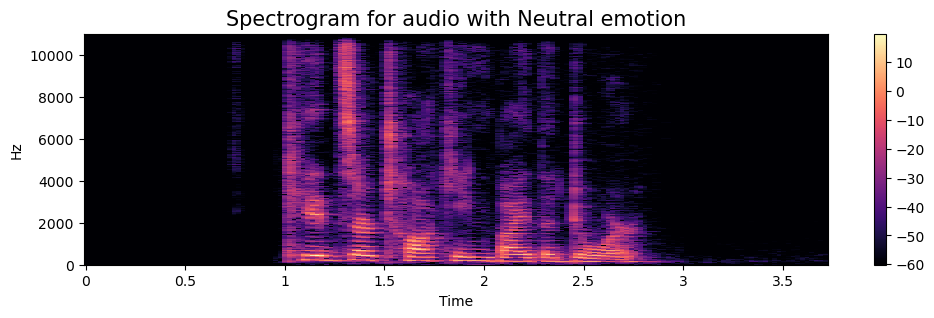

In [34]:
emotion = 'Neutral'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

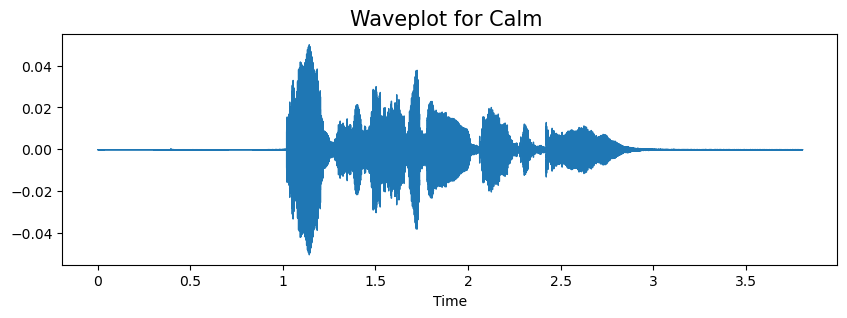

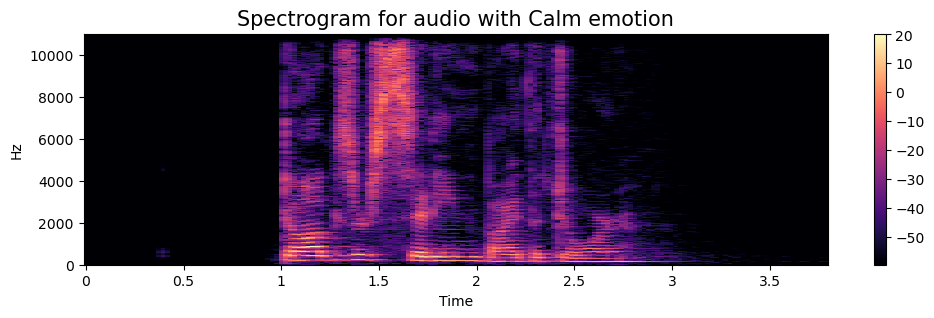

In [35]:
emotion = 'Calm'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

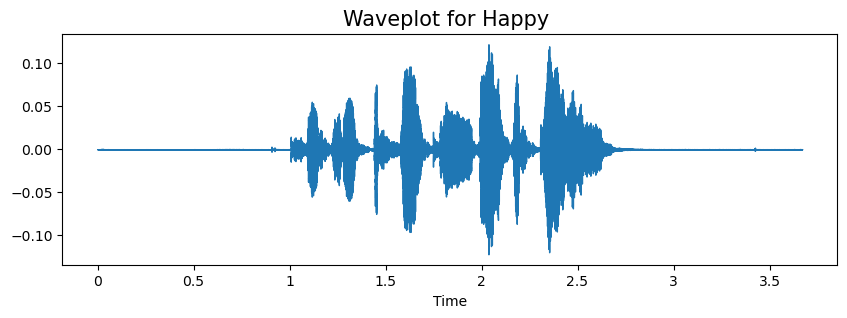

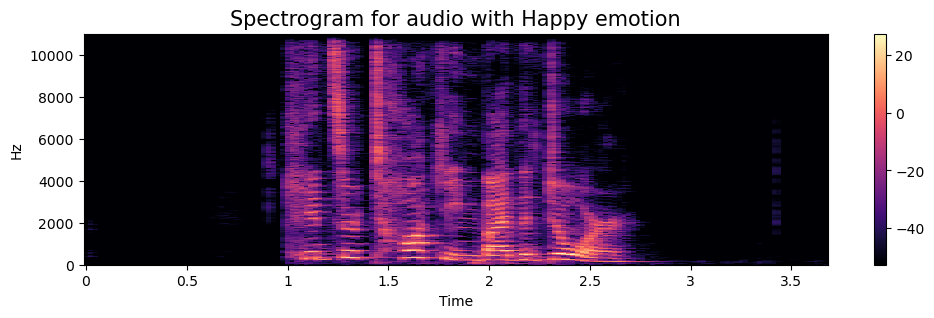

In [36]:
emotion = 'Happy'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

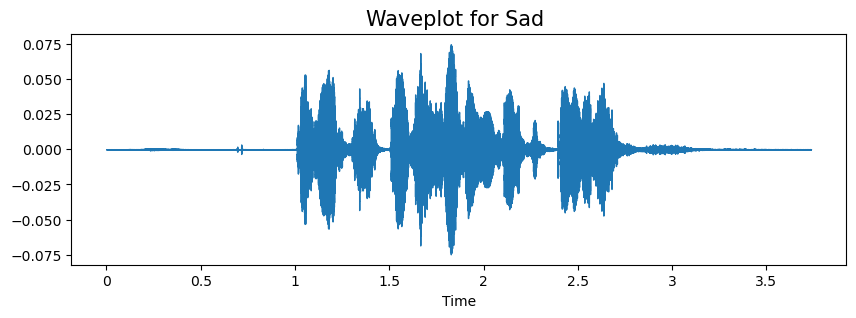

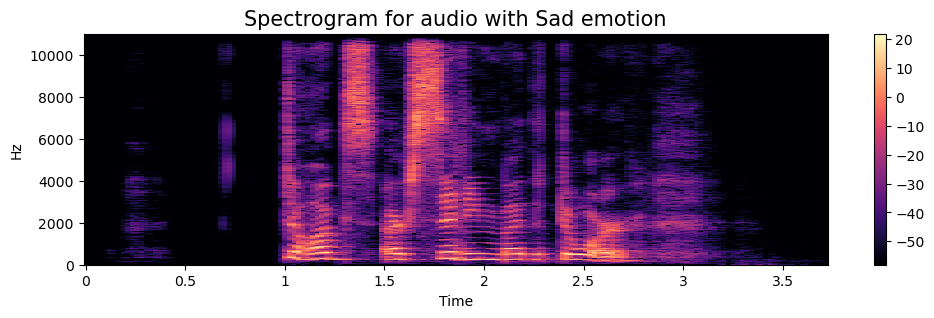

In [37]:
emotion = 'Sad'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

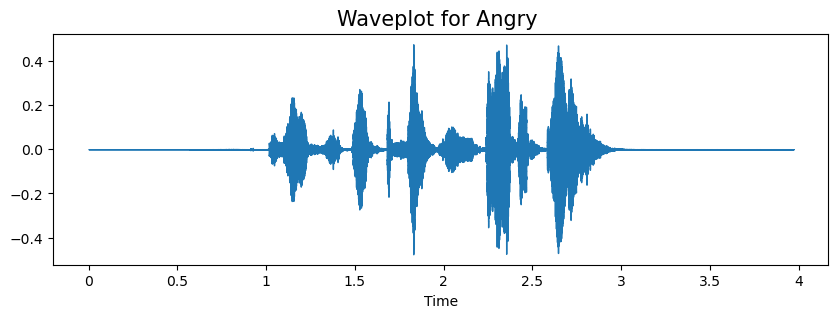

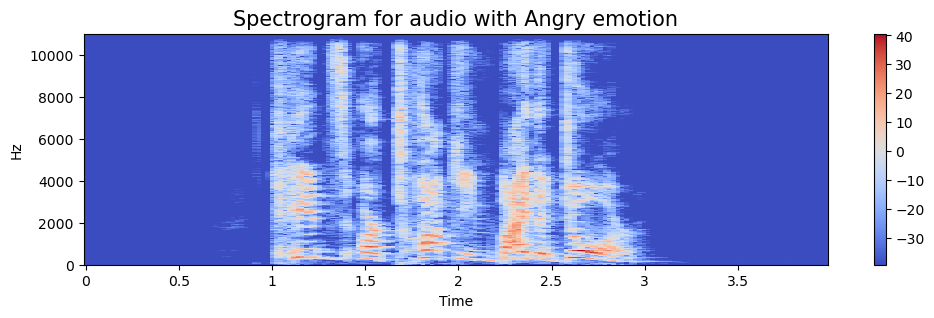

In [38]:
emotion = 'Angry'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

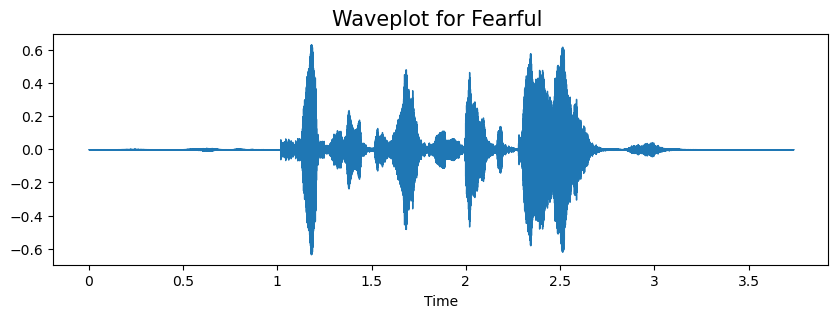

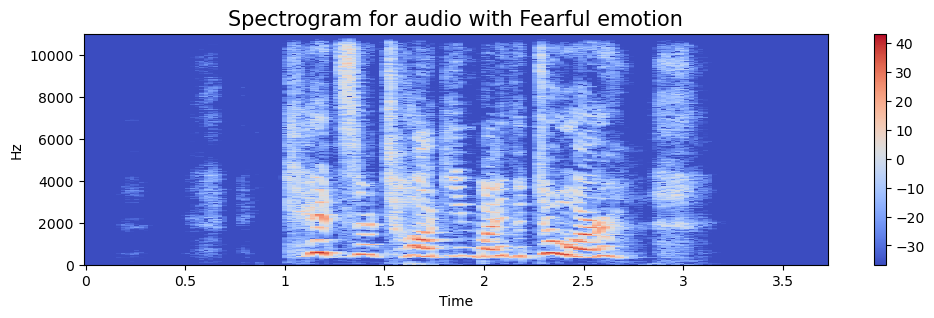

In [39]:
emotion = 'Fearful'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

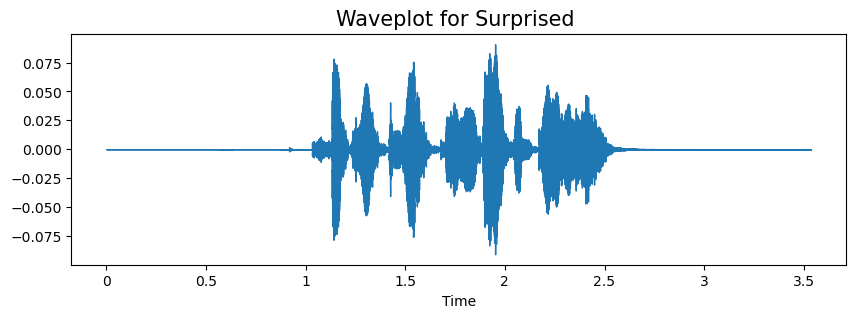

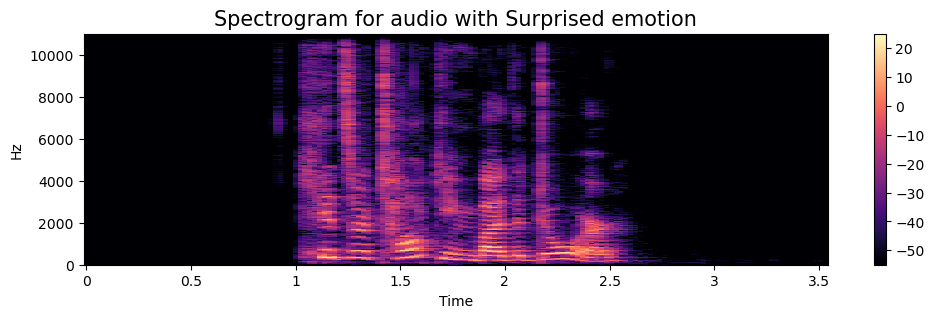

In [40]:
emotion = 'Surprised'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

In [41]:
def noise(data):
    noiseAmp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noiseAmp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shiftRange = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shiftRange)

def pitch(data, samplingRate, pitchFactor=0.7):
    return librosa.effects.pitch_shift(data, sr=samplingRate, n_steps=pitchFactor)

In [42]:
path = np.array(dataPath.Path)[1]
data, sampleRate = librosa.load(path)

In [43]:
path

'/Users/dewaiiv/Desktop/Project Deep Learning/RAVDESS/audio_speech_actors_01-24/Actor_16/03-01-06-01-02-02-16.wav'

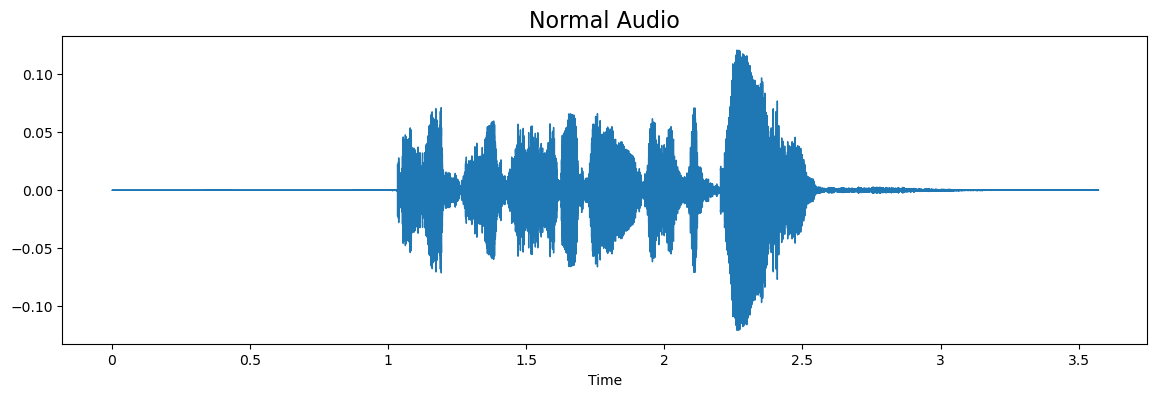

In [44]:
plt.figure(figsize=(14,4))
plt.title('Normal Audio', size=16)
librosa.display.waveshow(y=data, sr=sampleRate)
Audio(path)

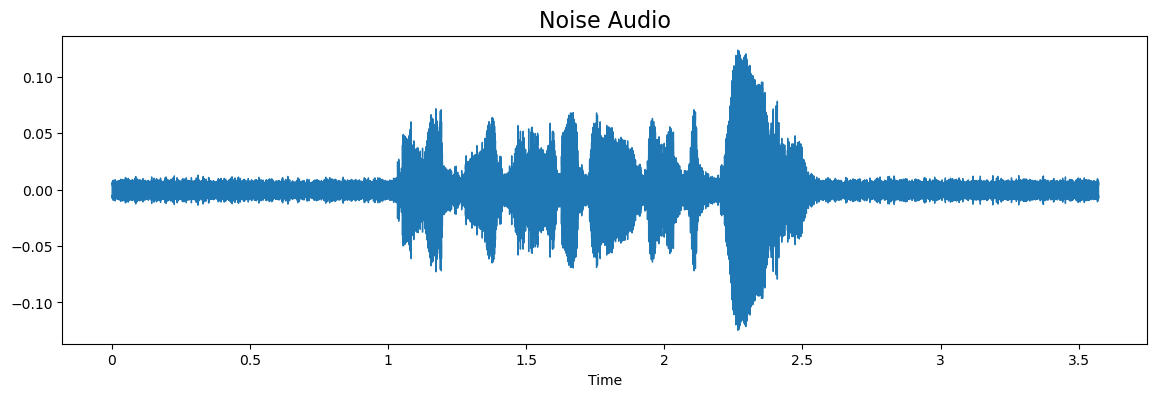

In [45]:
x = noise(data)
plt.figure(figsize=(14,4))
plt.title('Noise Audio', size=16)
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

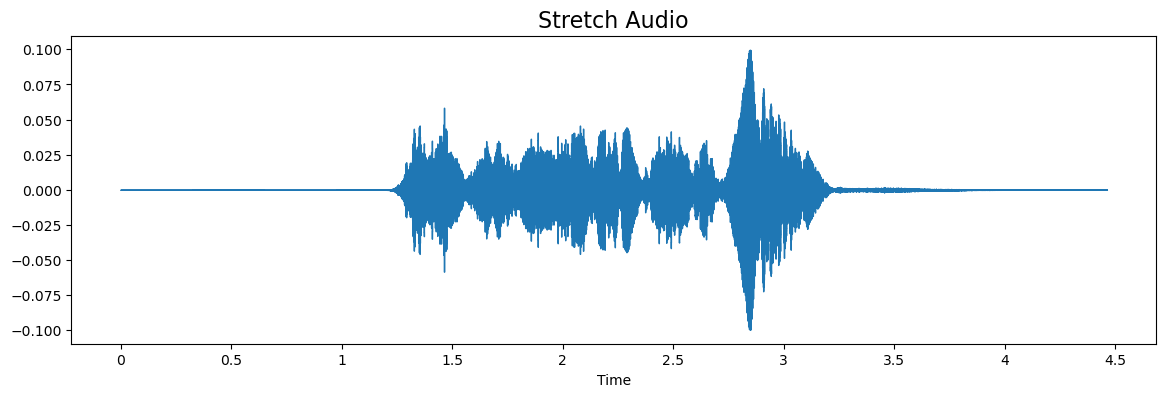

In [46]:
x = stretch(data)
plt.figure(figsize=(14,4))
plt.title('Stretch Audio', size=16)
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

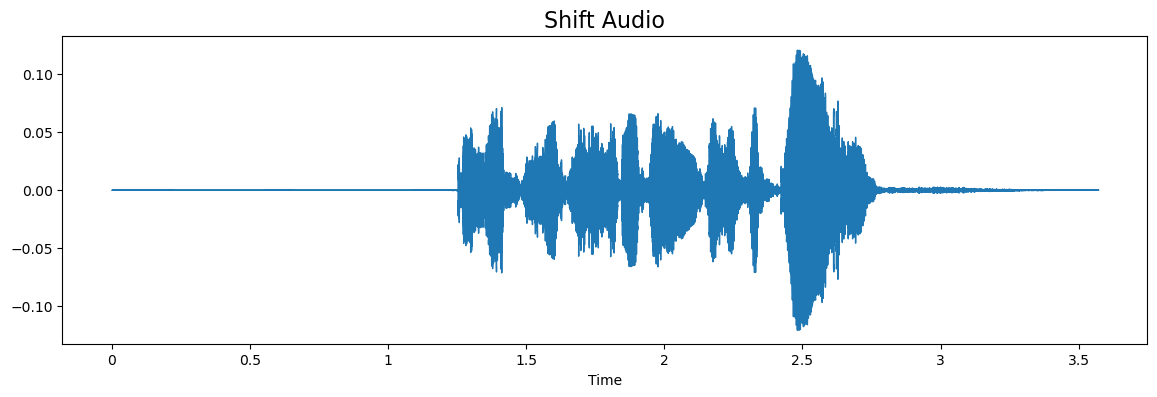

In [47]:
x = shift(data)
plt.figure(figsize=(14,4))
plt.title('Shift Audio', size=16)
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

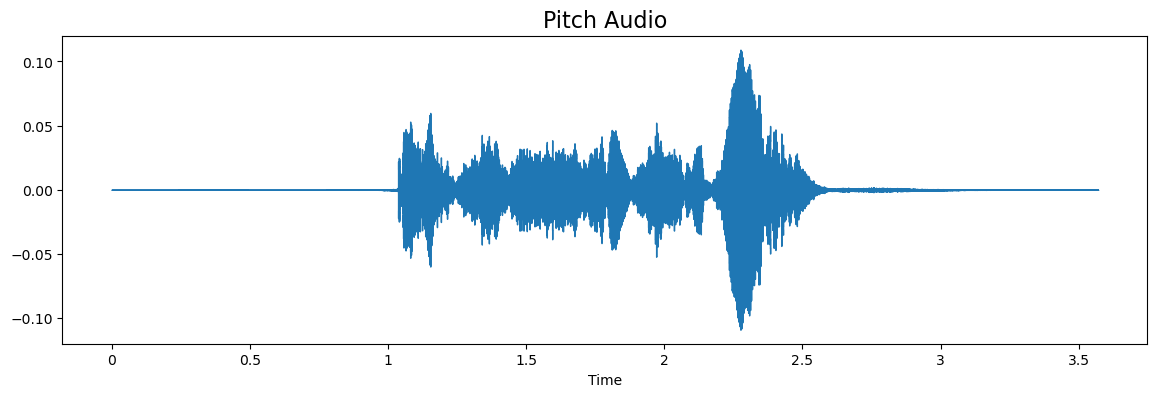

In [48]:
x = pitch(data, sampleRate)
plt.figure(figsize=(14, 4))
plt.title('Pitch Audio', size=16)
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

In [49]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampleRate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampleRate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampleRate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [50]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [51]:
X, Y = [], []
for path, emotion in zip(dataPath.Path, dataPath.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [52]:
len(X), len(Y), dataPath.Path.shape

(4608, 4608, (1536,))

In [53]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0         1         2         3         4         5         6  \
0  0.204540  0.522053  0.470343  0.491423  0.560348  0.548751  0.613287   
1  0.245723  0.561582  0.543838  0.568909  0.605904  0.594732  0.630752   
2  0.218537  0.588374  0.491138  0.457089  0.494087  0.553955  0.518942   
3  0.189815  0.559744  0.520431  0.484952  0.440133  0.394636  0.402852   
4  0.288701  0.717223  0.718508  0.697440  0.683625  0.634492  0.598641   

          7         8         9  ...       153       154       155       156  \
0  0.551326  0.534302  0.608861  ...  0.006682  0.004037  0.004855  0.004624   
1  0.551739  0.567805  0.658022  ...  0.006685  0.004029  0.004854  0.004641   
2  0.604753  0.512255  0.527947  ...  0.002836  0.001973  0.000855  0.000920   
3  0.411464  0.440253  0.506417  ...  0.002601  0.002952  0.003851  0.003154   
4  0.549547  0.562603  0.590169  ...  0.002691  0.003025  0.003924  0.003219   

        157       158       159       160       161  Emotions  
0  0.005723  0.006007  0.006103  0.005150  0.000251     Angry  
1  0.005727  0.006009  0.006121  0.005165  0.000255     Angry  
2  0.001194  0.000980  0.001365  0.000594  0.000053     Angry  
3  0.002964  0.002586  0.002761  0.001653  0.000115   Fearful  
4  0.003064  0.002675  0.002862  0.001764  0.000210   Fearful  

[5 rows x 163 columns]

In [54]:
# Taking all rows and all cols without last col for X which include features
# Taking last col for Y, which include the emotions

X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [55]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [56]:
print(Y.shape)
print(X.shape)

(4608, 8)
(4608, 162)


In [57]:
from sklearn.model_selection import train_test_split

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3686, 162), (3686, 8), (922, 162), (922, 8))

In [58]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3686, 162), (3686, 8), (922, 162), (922, 8))

In [59]:
#Reshape for CNN MODEL
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((3686, 162, 1), (3686, 8), (922, 162, 1), (922, 8))

In [60]:
from keras import Sequential
from keras.layers import Conv1D, MaxPool1D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

# First Conv1D block
model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

# Second Conv1D block
model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.3))  # Regularization to prevent overfitting

# Third Conv1D block
model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.3))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))  # Small Dense layer for efficient learning
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))  # For 8 emotion classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 162, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 81, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       172,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,616 (799.28 KB)

 Trainable params: 204,168 (797.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [61]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('best_model_02.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

history = model.fit(
    x_traincnn, 
    y_train, 
    epochs=50, 
    validation_data=(x_testcnn, y_test), 
    batch_size=64,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

Epoch 1/50
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1845 - loss: 2.5173
Epoch 1: val_accuracy improved from -inf to 0.23210, saving model to best_model_02.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1866 - loss: 2.5000 - val_accuracy: 0.2321 - val_loss: 2.0679 - learning_rate: 0.0010
Epoch 2/50
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2805 - loss: 1.8616
Epoch 2: val_accuracy did not improve from 0.23210
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2812 - loss: 1.8592 - val_accuracy: 0.2158 - val_loss: 2.4200 - learning_rate: 0.0010
Epoch 3/50
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3306 - loss: 1.7149
Epoch 3: val_accuracy improved from 0.23210 to 0.26356, saving model to best_model_02.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3314 - loss: 1.7127 - val_accuracy: 0.2636 - val_loss: 2.4325 - learning_rate: 0.0010
Epoch 4/50
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3493 - loss: 1.6519
Epoch 4:

In [62]:
from keras.models import load_model

# Load the best saved model
best_model = load_model('best_model_02.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(x_testcnn, y_test, verbose=1)
print(f"Best Test Accuracy: {test_accuracy:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.7937
Best Test Accuracy: 0.7332


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.7913
Accuracy of our model on test data :  72.77657389640808 %


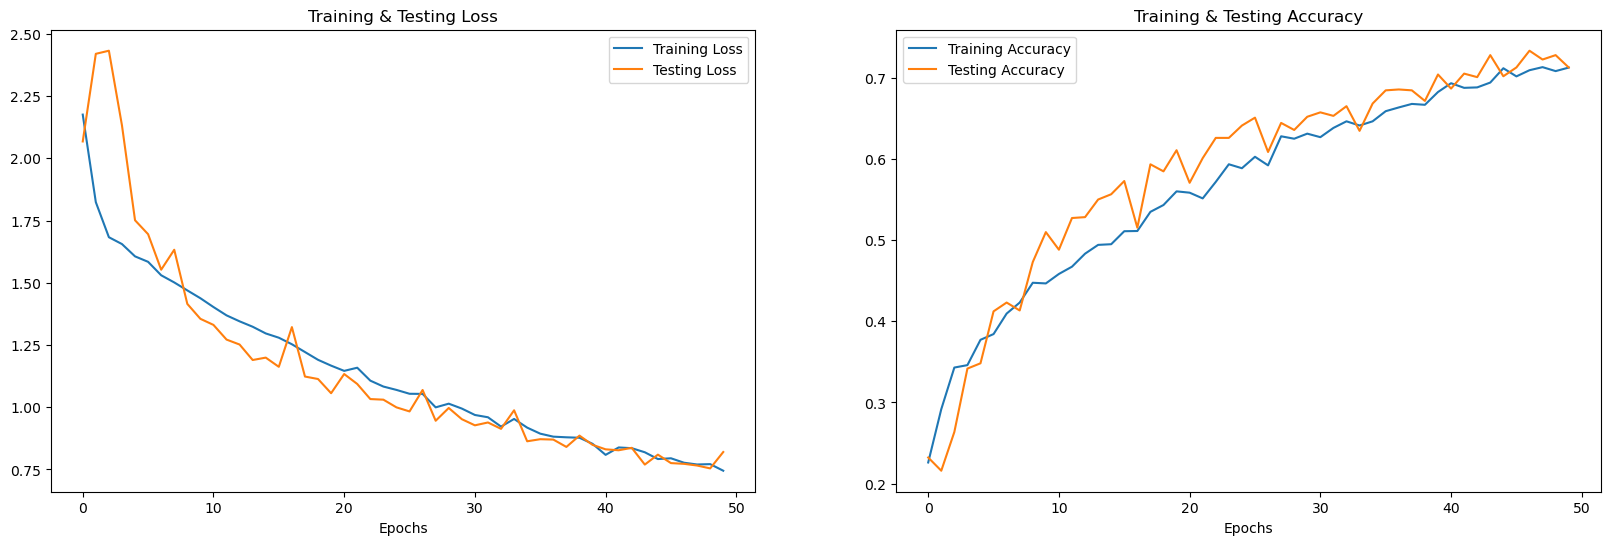

In [63]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [64]:
# predicting on test data.
pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [65]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0        Surprised     Surprised
1          Neutral       Neutral
2            Angry         Happy
3          Fearful           Sad
4        Surprised     Surprised
5        Surprised     Surprised
6          Disgust       Disgust
7        Surprised     Surprised
8          Disgust         Happy
9             Calm           Sad

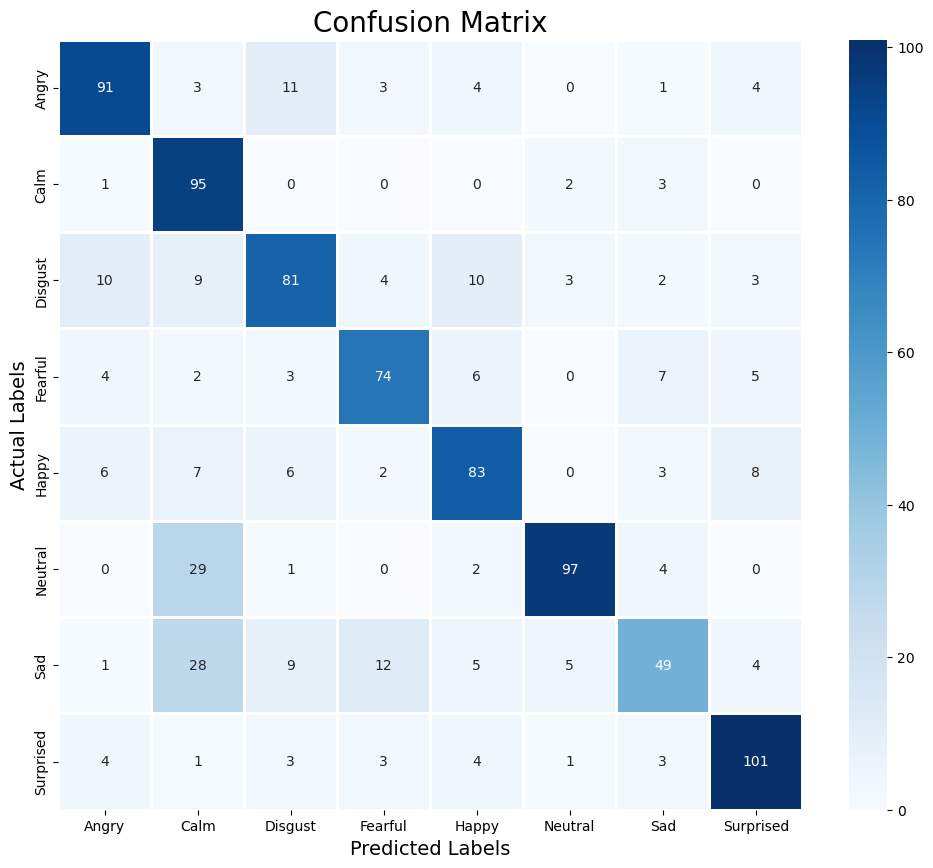

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sbn.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.78      0.78      0.78       117
        Calm       0.55      0.94      0.69       101
     Disgust       0.71      0.66      0.69       122
     Fearful       0.76      0.73      0.74       101
       Happy       0.73      0.72      0.72       115
     Neutral       0.90      0.73      0.80       133
         Sad       0.68      0.43      0.53       113
   Surprised       0.81      0.84      0.82       120

    accuracy                           0.73       922
   macro avg       0.74      0.73      0.72       922
weighted avg       0.74      0.73      0.73       922

